<a href="https://colab.research.google.com/github/DEVARASAIGANESH29/co2-emission-ml-project/blob/main/co2_emission_from_car_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

In [31]:

url = "https://raw.githubusercontent.com/DEVARASAIGANESH29/co2-emission-ml-project/main/DATA.csv"

df = pd.read_csv(url)
df.head()


,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [32]:
df = pd.read_csv(url)

In [33]:
df.head()

,Car,Model,Volume,Weight,CO2,Unnamed: 5
0,Toyota,Aygo,1000,790,99,NaN
1,Mitsubishi,Space Star,1200,1160,95,NaN
2,Skoda,Citigo,1000,929,95,NaN
3,Fiat,500,900,865,90,NaN
4,Mini,Cooper,1500,1140,105,NaN


In [34]:
df.shape


(36, 6)

In [35]:
df1 = df[['Volume','Weight','CO2']]
print(df1.corr())

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         36 non-null     object 
 1   Model       36 non-null     object 
 2   Volume      36 non-null     int64  
 3   Weight      36 non-null     int64  
 4   CO2         36 non-null     int64  
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [37]:
df.describe()

,Volume,Weight,CO2,Unnamed: 5
count,36.000000,36.000000,36.000000,0.0
mean,1611.111111,1292.277778,102.027778,NaN
std,388.975047,242.123889,7.454571,NaN
min,900.000000,790.000000,90.000000,NaN
25%,1475.000000,1117.250000,97.750000,NaN
50%,1600.000000,1329.000000,99.000000,NaN
75%,2000.000000,1418.250000,105.000000,NaN
max,2500.000000,1746.000000,120.000000,NaN


In [38]:
x = df[['Volume','Weight']]
y = df['CO2']

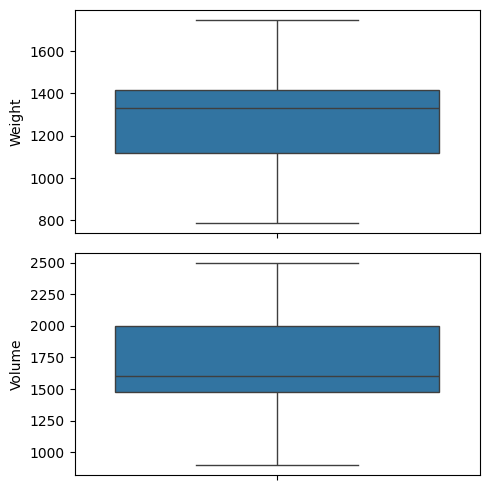

In [39]:
fig, axs = plt.subplots(2,figsize = (5,5))
plt1 = sns.boxplot(df['Weight'],ax = axs[0])
plt2 = sns.boxplot(df['Volume'],ax = axs[1])
plt.tight_layout()

<Axes: xlabel='CO2', ylabel='Density'>

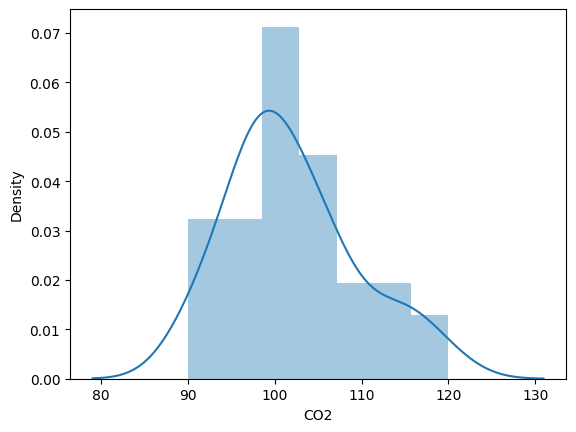

In [40]:
sns.distplot(df['CO2'])

<Axes: xlabel='Weight', ylabel='Density'>

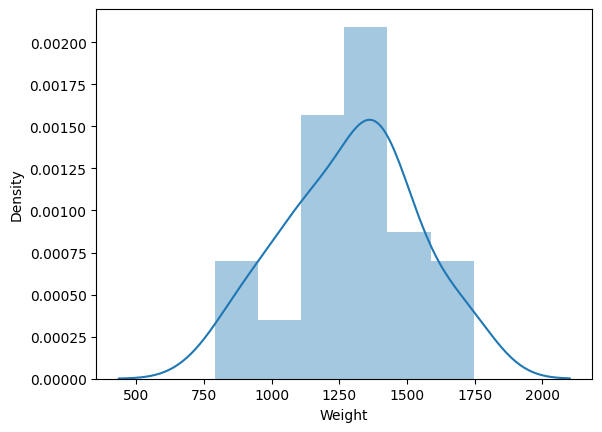

In [41]:
sns.distplot(df['Weight'])

<Axes: xlabel='Volume', ylabel='Density'>

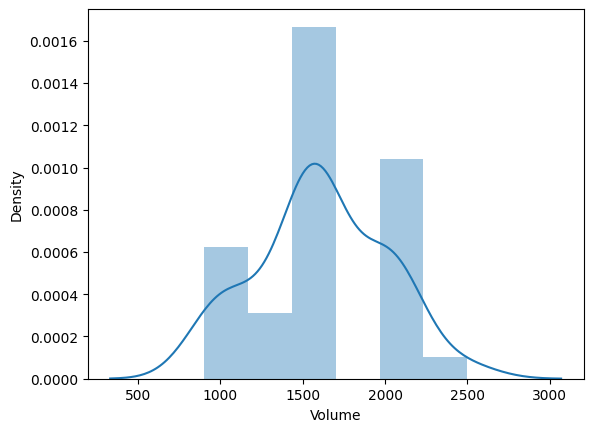

In [42]:
sns.distplot(df['Volume'])

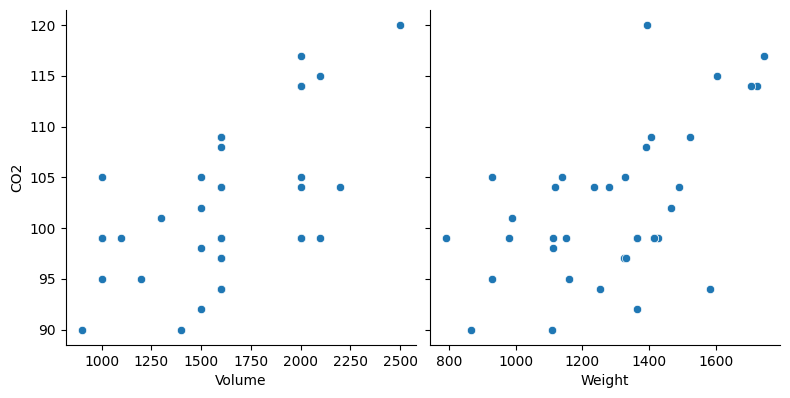

In [43]:
sns.pairplot(df1, x_vars = ['Volume','Weight'], y_vars = 'CO2', height = 4, aspect = 1, kind = 'scatter')
plt.show()

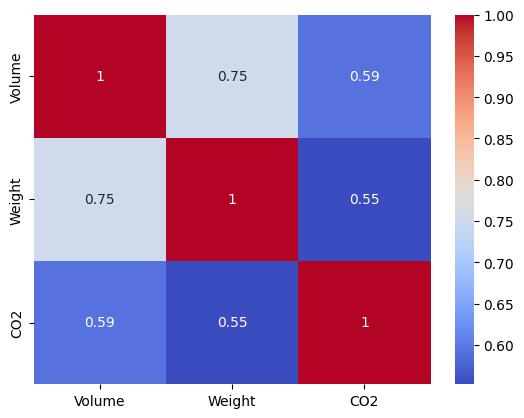

In [44]:
sns.heatmap(df1.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [45]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 100)

In [46]:
x_train.shape

(25, 2)

In [47]:
x_test.shape

(11, 2)

In [48]:
y_train.shape

(25,)

In [49]:
y_test.shape

(11,)

In [50]:
reg_model = linear_model.LinearRegression()

In [51]:
reg_model = LinearRegression().fit(x_train,y_train)

In [52]:
print('Intercept:', reg_model.intercept_)
print('Coefficients:', reg_model.coef_)

Intercept: 74.33882836589247
Coefficients: [0.00250464 0.01718006]


In [53]:
list(zip(x,reg_model.coef_))

[('Volume', np.float64(0.0025046399866402932)),
 ('Weight', np.float64(0.017180064599637404))]

In [54]:
y_pred =reg_model.predict(x_test)

In [55]:
y_pred

array([ 90.41571939, 102.16323413,  99.56363213, 104.56661845,
       101.54657652,  95.94770019, 108.64011848, 102.22654214,
        92.80374837,  97.27327129,  97.57074463])

In [56]:
y_test

,CO2
0,99
19,105
32,104
35,120
7,92
12,99
29,114
33,108
5,105
1,95


In [57]:
x_pred = reg_model.predict(x_train)

In [58]:
x_pred

array([103.04936052,  96.89801599,  99.85569322,  98.10332663,
       104.94640459, 104.51149073,  94.6031243 ,  97.68106199,
       109.34450113, 107.17257602, 101.83951902, 102.48424311,
       101.127018  , 103.26458298, 108.98371977, 103.88124059,
        92.80374837, 105.55947467,  93.93039566, 101.79704052,
       101.19573826, 102.65604375,  91.45376023, 103.65789975,
        97.20002018])

In [59]:
print( "prediction for test set:{}".format(y_pred))

prediction for test set:[ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [60]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff


,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [61]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred,'difference': y_test-y_pred})
reg_model_diff

,Actual value,Predicted value,difference
0,99,90.415719,8.584281
19,105,102.163234,2.836766
32,104,99.563632,4.436368
35,120,104.566618,15.433382
7,92,101.546577,-9.546577
12,99,95.947700,3.052300
29,114,108.640118,5.359882
33,108,102.226542,5.773458
5,105,92.803748,12.196252
1,95,97.273271,-2.273271


In [62]:
y_train_pred = reg_model.predict(x_train)

In [63]:
y_train_pred

array([103.04936052,  96.89801599,  99.85569322,  98.10332663,
       104.94640459, 104.51149073,  94.6031243 ,  97.68106199,
       109.34450113, 107.17257602, 101.83951902, 102.48424311,
       101.127018  , 103.26458298, 108.98371977, 103.88124059,
        92.80374837, 105.55947467,  93.93039566, 101.79704052,
       101.19573826, 102.65604375,  91.45376023, 103.65789975,
        97.20002018])

In [64]:
reg_model_diff = pd.DataFrame({'Actual value': y_train, 'Predicted value': y_train_pred,'difference': y_train-y_train_pred})
reg_model_diff

,Actual value,Predicted value,difference
22,99,103.049361,-4.049361
6,90,96.898016,-6.898016
13,94,99.855693,-5.855693
9,99,98.103327,0.896673
26,104,104.946405,-0.946405
28,109,104.511491,4.488509
11,101,94.603124,6.396876
4,105,97.681062,7.318938
31,117,109.344501,7.655499
30,115,107.172576,7.827424


In [65]:
print ('Mean absolute error for test data :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean squared error for test data :', metrics.mean_squared_error(y_test, y_pred))
print('root mean squared error for test data:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2 score for test data:', metrics.r2_score(y_test,y_pred))

Mean absolute error for test data : 6.90198090163631
Mean squared error for test data : 63.39765310998782
root mean squared error for test data: 7.962264320530173
R2 score for test data: -0.07468703086418138


In [66]:
print('Mean absolute error for training data:',metrics .mean_absolute_error(y_train,y_train_pred))
print('Mean squared error for training data:', metrics .mean_squared_error(y_train,y_train_pred))
print('Root mean squared error for training data:', np.sqrt(metrics .mean_squared_error(y_train,y_train_pred)))
print('R2 score for training data:', metrics .r2_score(y_train,y_train_pred))

Mean absolute error for training data: 4.507381846756468
Mean squared error for training data: 27.064439696570407
Root mean squared error for training data: 5.202349440067478
R2 score for training data: 0.4493008591497427
